<a href="https://colab.research.google.com/github/gershonc/Exploratory-data-analysis-EDA/blob/main/EDA_Workshop_10_Dec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
                                                                        
#   ___         _____            __               _____    __     _ __          
#  / _ )__ __  / ___/__ _______ / /  ___  ___    / ___/__ / /__  (_) /_____ ____
# / _  / // / / (_ / -_) __(_-</ _ \/ _ \/ _ \  / /__/ -_) / _ \/ /  '_/ -_) __/
#/____/\_, /  \___/\__/_/ /___/_//_/\___/_//_/  \___/\__/_/_//_/_/_/\_\\__/_/   
#     /___/                                                                     


In [ ]:
import numpy as np
import pandas as pd

%pylab inline
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

Populating the interactive namespace from numpy and matplotlib


In [ ]:
ls

 Volume in drive C is OSDisk
 Volume Serial Number is 3C0E-413E

 Directory of C:\Users\gcelniker\Desktop\iPython_notebooks\Speech_Text_Analytics

07/05/2016  02:23 PM    <DIR>          .
07/05/2016  02:23 PM    <DIR>          ..
07/05/2016  02:23 PM    <DIR>          .ipynb_checkpoints
06/27/2016  12:51 PM           986,825 data_visualizations_seaborn_2nd_MPG_IRIS_mahalobis.ipynb
07/05/2016  02:21 PM            12,273 results_DE_ES.csv
               2 File(s)        999,098 bytes
               3 Dir(s)  11,958,456,320 bytes free


# Vehicles dataset - regression and correlation plots

In [ ]:
results=pd.read_csv('sresults_DE_ES.csvpee')

In [ ]:
names = [
       'mpg'
    ,  'cylinders'
    ,  'displacement'
    ,  'horsepower'
    ,  'weight'
    ,  'acceleration'
    ,  'model_year'
    ,  'origin'
    ,  'car_name'
]
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data", sep='\s+', names=names)
df['maker'] = df.car_name.map(lambda x: x.split()[0])
df.origin = df.origin.map({1: 'America', 2: 'Europe', 3: 'Asia'})
df=df.applymap(lambda x: np.nan if x == '?' else x).dropna()
df['horsepower'] = df.horsepower.astype(float)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,maker
0,18.0,8,307.0,130.0,3504.0,12.0,70,America,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693.0,11.5,70,America,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436.0,11.0,70,America,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433.0,12.0,70,America,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449.0,10.5,70,America,ford torino,ford


## Factorplot and FacetGrid

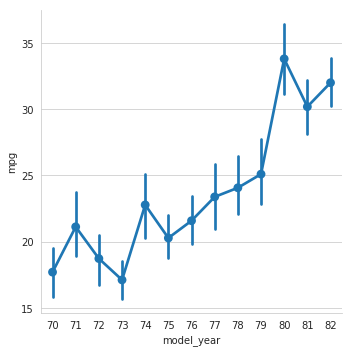

In [ ]:
sns.set_style("whitegrid")

#sns.factorplot(data=df, x="model_year", y="mpg",size=5, aspect=1.5)
sns.factorplot(data=df, x="model_year", y="mpg")

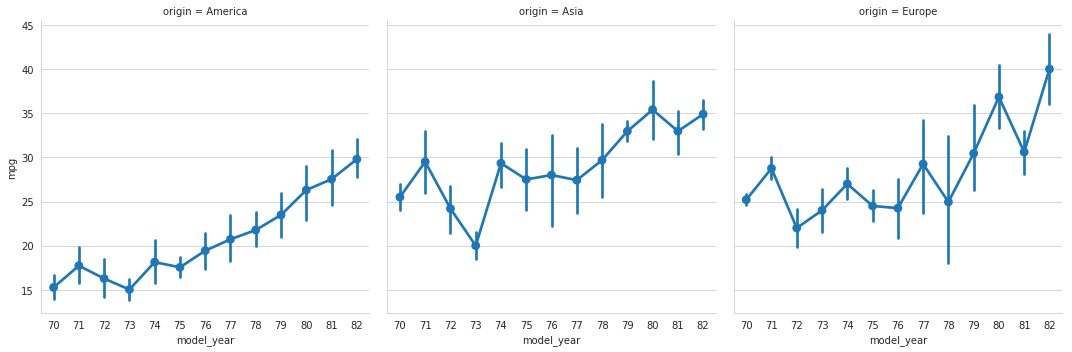

In [ ]:

sns.factorplot(data=df, x="model_year", y="mpg", col="origin")

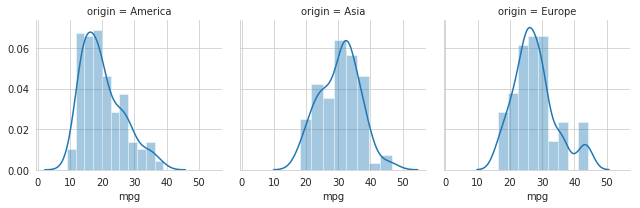

In [ ]:
g = sns.FacetGrid(df, col="origin")
g.map(sns.distplot, "mpg")

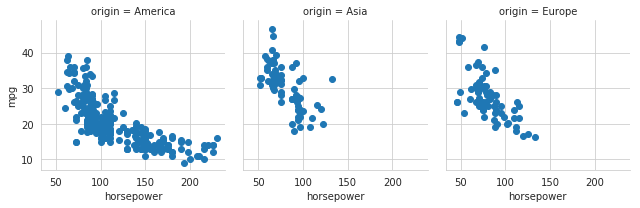

In [ ]:
g = sns.FacetGrid(df, col="origin")
g.map(plt.scatter, "horsepower", "mpg")

(0, 60)

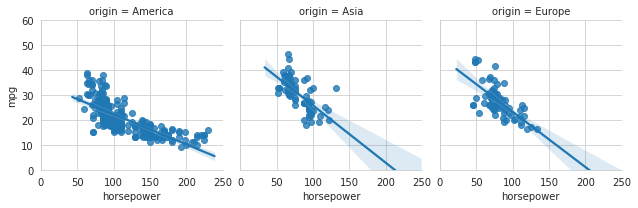

In [ ]:
g = sns.FacetGrid(df, col="origin")
g.map(sns.regplot, "horsepower", "mpg")
plt.xlim(0, 250)
plt.ylim(0, 60)

## Pairplot

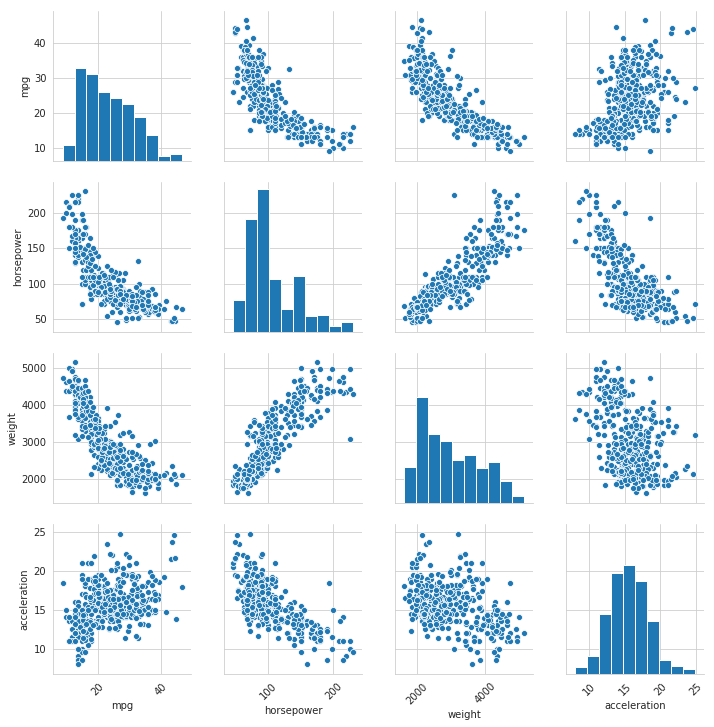

In [ ]:
g = sns.pairplot(df[["mpg", "horsepower", "weight", "acceleration", "origin"]],  diag_kind="hist")
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45)

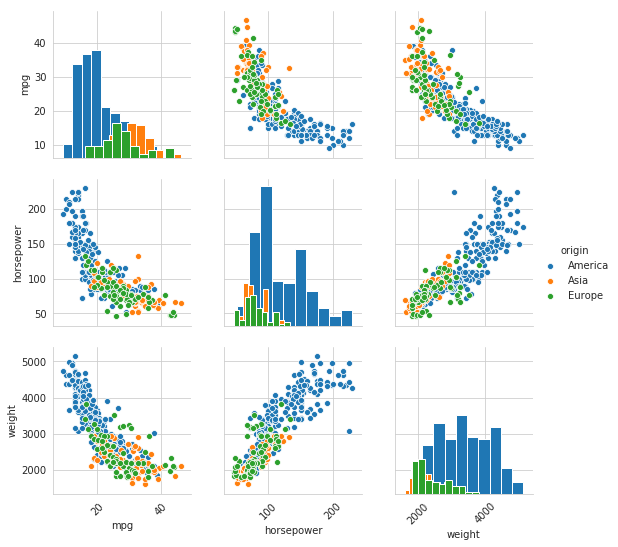

In [ ]:
g = sns.pairplot(df[["mpg", "horsepower", "weight", "origin"]], hue="origin", diag_kind="hist")
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45)

## Joinplot (regression with scipy and correlation)

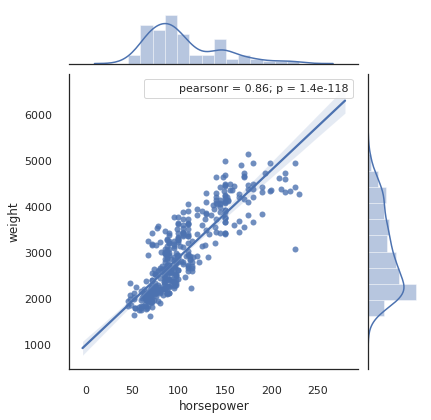

In [ ]:
#sns.jointplot("horsepower", "weight", data=df, kind="reg")
import scipy.stats as stats
#style.use('seaborn-poster') #sets the size of the charts
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("white")

j = sns.jointplot('horsepower', "weight", data=df, kind="reg")
j.annotate(stats.pearsonr)


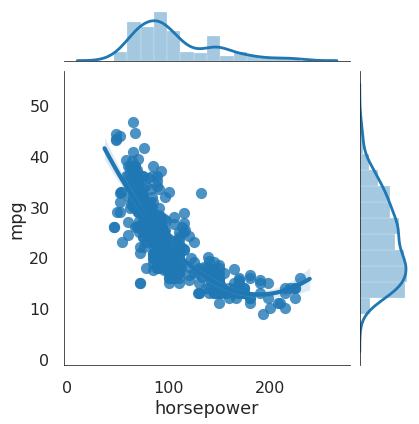

In [ ]:
g = sns.JointGrid(x="horsepower", y="mpg", data=df)
g.plot_joint(sns.regplot, order=2)
g.plot_marginals(sns.distplot)

In [ ]:
import scipy
scipy.stats.pearsonr(df['horsepower'],df['mpg'] )

(-0.7784267838977759, 7.031989029404564e-81)

In [ ]:
import scipy
scipy.stats.pearsonr(df['weight'],df['mpg'] )

(-0.8322442148315754, 6.0152960514354658e-102)

In [ ]:
import scipy
scipy.stats.pearsonr(df['horsepower'],df['weight'] )

(0.8645377375741442, 1.364346877373491e-118)

In [ ]:
import seaborn as sns
sns.set()
#x = np.linspace(0, 10, 1000)
#plt.plot(x, np.sin(x), x, np.cos(x));

In [ ]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


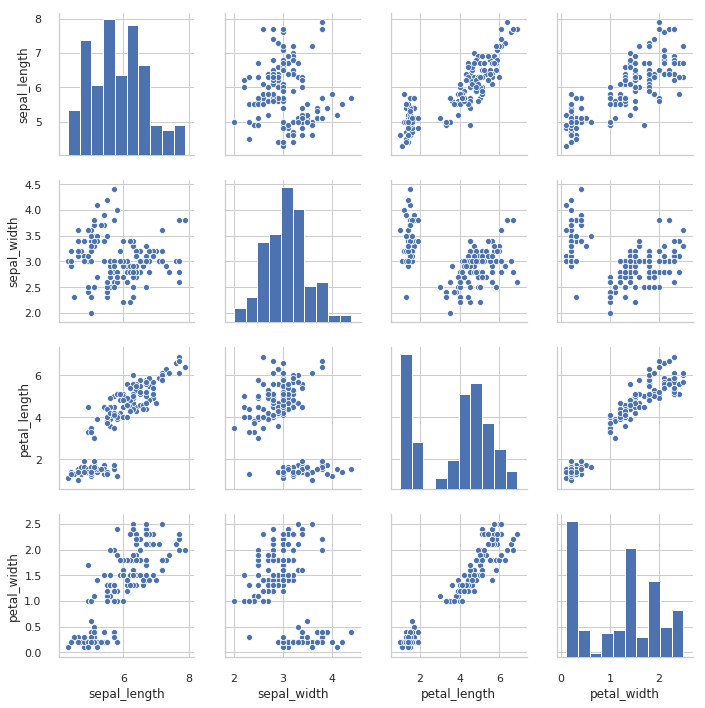

In [ ]:
sns.set_style("whitegrid")

iris = sns.load_dataset("iris")
sns.pairplot(iris);

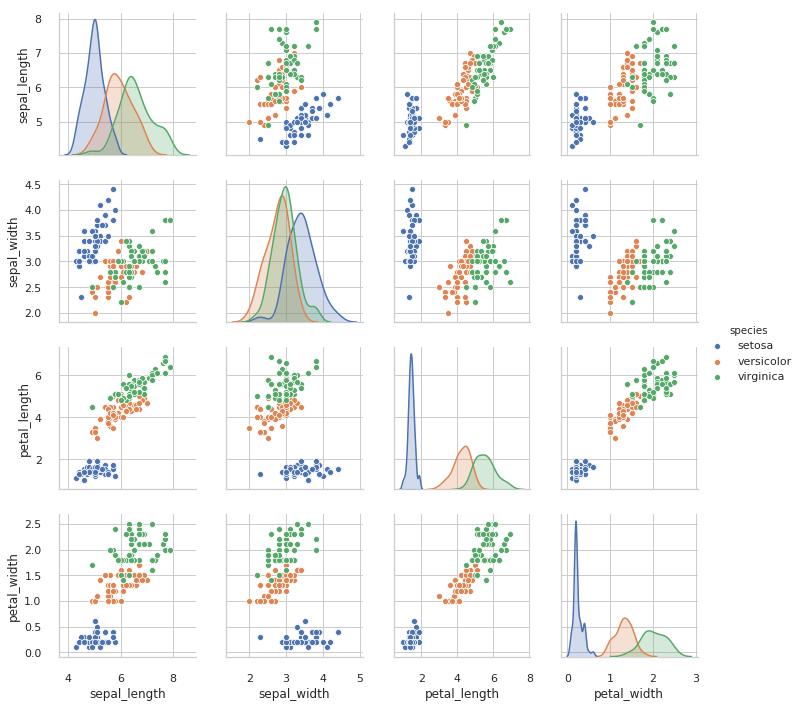

In [ ]:
sns.set_style("whitegrid")

sns.pairplot(iris, hue='species', size=2.5);

# PCA on Iris data visualization 

explained variance ratio (first two components): [0.92461872 0.05306648]


<Figure size 842.4x595.44 with 0 Axes>

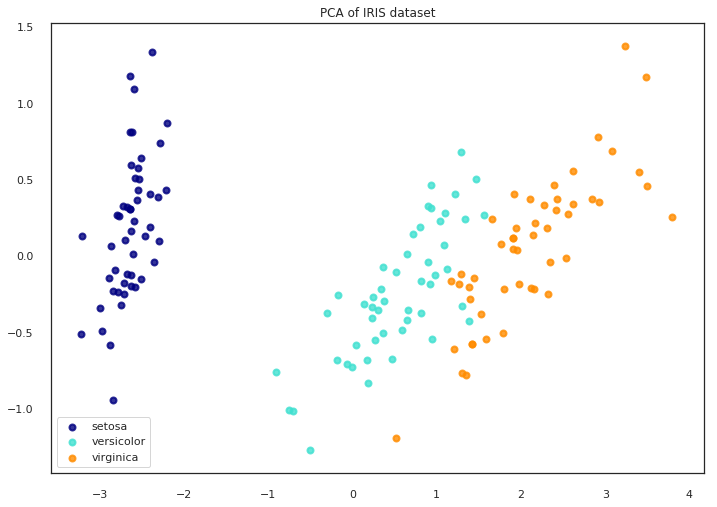

<Figure size 842.4x595.44 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure()


In [ ]:
sns.set_style("whitegrid")

tips = sns.load_dataset('tips')
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


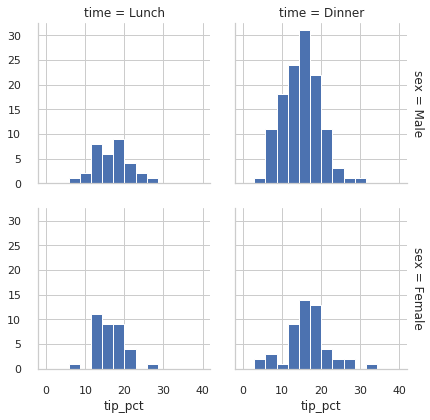

In [ ]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

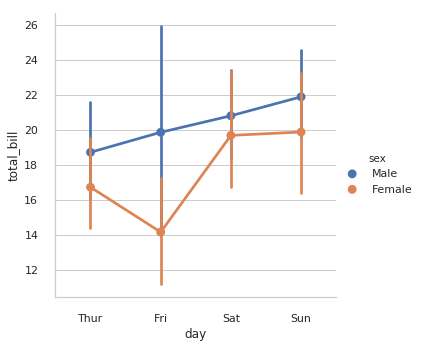

In [ ]:
sns.factorplot(x="day", y="total_bill", hue="sex", data=tips);

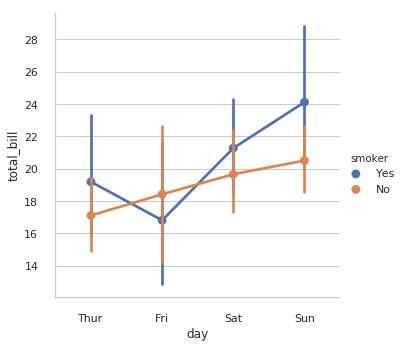

In [ ]:
sns.factorplot(x="day", y="total_bill", hue="smoker", data=tips);

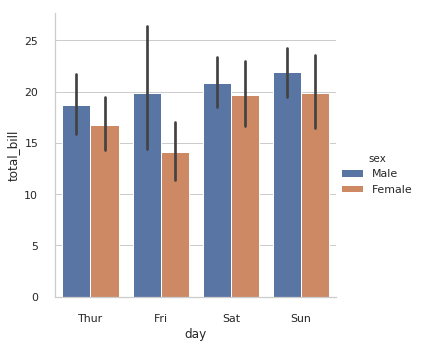

In [ ]:
sns.factorplot(x="day", y="total_bill", hue="sex", data=tips, kind="bar");

/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


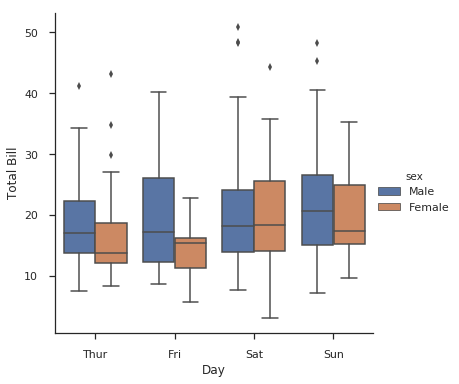

In [ ]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box", size=5.5)
    g.set_axis_labels("Day", "Total Bill");

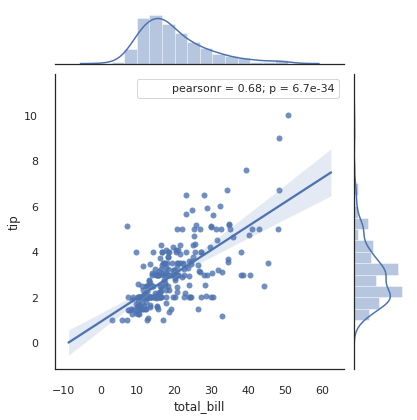

In [ ]:
#sns.jointplot("total_bill", "tip", data=tips, kind='reg');

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("white")

j = sns.jointplot('total_bill', "tip", data=tips, kind="reg")
j.annotate(stats.pearsonr)

In [ ]:
#sns.barplot("total_bill", "tip", data=tips)

In [ ]:
sns.boxplot(data=iris, orient="h");

KeyError: ignored

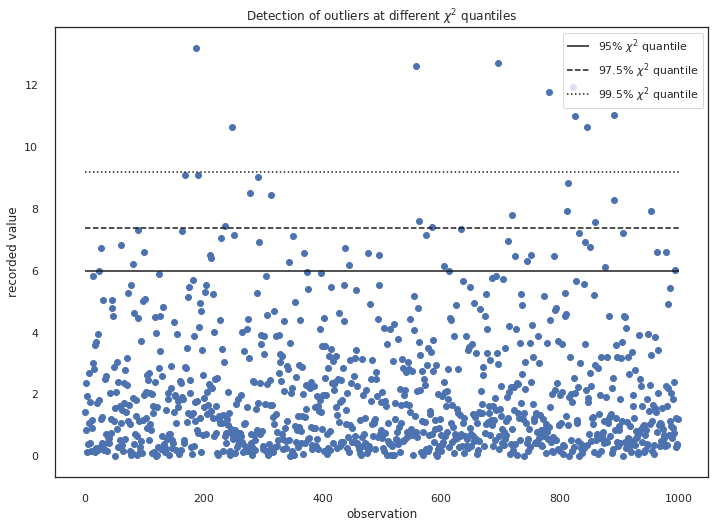

In [ ]:
#imports and definitions
import numpy as np
import scipy.stats as stats
import scipy.spatial.distance as distance
import matplotlib.pyplot as plt
chi2 = stats.chi2
np.random.seed(111)


#covariance matrix: X and Y are normally distributed with std of 1
#and are independent one of another
covCircle = np.array([[1, 0.], [0., 1.]])
circle = np.random.multivariate_normal([0, 0], covCircle, 1000) #1000 points around [0, 0]
mahalanobis = lambda p: distance.mahalanobis(p, [0, 0], covCircle.T)
d = np.array(map(mahalanobis, circle)) #Mahalanobis distance values for the 1000 points
d2 = d ** 2 #MD squared

degrees_of_freedom = 2

x = range( len( d2 ))

plt.subplot(111)

plt.scatter( x, d2 )

plt.hlines( chi2.ppf(0.95, degrees_of_freedom), 0, len(d2), label ="95% $\chi^2$ quantile", linestyles = "solid" ) 
plt.hlines( chi2.ppf(0.975, degrees_of_freedom), 0, len(d2), label ="97.5% $\chi^2$ quantile", linestyles="dashed" ) 
plt.hlines( chi2.ppf(0.99, degrees_of_freedom), 0, len(d2), label ="99.5% $\chi^2$ quantile", linestyles = "dotted" )

plt.legend()
plt.ylabel("recorded value")
plt.xlabel("observation")
plt.title( 'Detection of outliers at different $\chi^2$ quantiles' )

plt.show()

([], <a list of 0 Text yticklabel objects>)

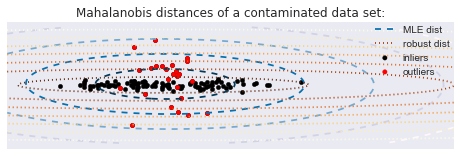

In [ ]:


import numpy as np
import matplotlib.pyplot as plt

from sklearn.covariance import EmpiricalCovariance, MinCovDet

n_samples = 125
n_outliers = 25
n_features = 2

# generate data
gen_cov = np.eye(n_features)
gen_cov[0, 0] = 2.
X = np.dot(np.random.randn(n_samples, n_features), gen_cov)
# add some outliers
outliers_cov = np.eye(n_features)
outliers_cov[np.arange(1, n_features), np.arange(1, n_features)] = 7.
X[-n_outliers:] = np.dot(np.random.randn(n_outliers, n_features), outliers_cov)

# fit a Minimum Covariance Determinant (MCD) robust estimator to data
robust_cov = MinCovDet().fit(X)

# compare estimators learnt from the full data set with true parameters
emp_cov = EmpiricalCovariance().fit(X)

###############################################################################
# Display results
fig = plt.figure()
plt.subplots_adjust(hspace=-.1, wspace=.4, top=.95, bottom=.05)

# Show data set
subfig1 = plt.subplot(3, 1, 1)
inlier_plot = subfig1.scatter(X[:, 0], X[:, 1],
                              color='black', label='inliers')
outlier_plot = subfig1.scatter(X[:, 0][-n_outliers:], X[:, 1][-n_outliers:],
                               color='red', label='outliers')
subfig1.set_xlim(subfig1.get_xlim()[0], 11.)
subfig1.set_title("Mahalanobis distances of a contaminated data set:")

# Show contours of the distance functions
xx, yy = np.meshgrid(np.linspace(plt.xlim()[0], plt.xlim()[1], 100),
                     np.linspace(plt.ylim()[0], plt.ylim()[1], 100))
zz = np.c_[xx.ravel(), yy.ravel()]

mahal_emp_cov = emp_cov.mahalanobis(zz)
mahal_emp_cov = mahal_emp_cov.reshape(xx.shape)
emp_cov_contour = subfig1.contour(xx, yy, np.sqrt(mahal_emp_cov),
                                  cmap=plt.cm.PuBu_r,
                                  linestyles='dashed')

mahal_robust_cov = robust_cov.mahalanobis(zz)
mahal_robust_cov = mahal_robust_cov.reshape(xx.shape)
robust_contour = subfig1.contour(xx, yy, np.sqrt(mahal_robust_cov),
                                 cmap=plt.cm.YlOrBr_r, linestyles='dotted')

subfig1.legend([emp_cov_contour.collections[1], robust_contour.collections[1],
                inlier_plot, outlier_plot],
               ['MLE dist', 'robust dist', 'inliers', 'outliers'],
               loc="upper right", borderaxespad=0)
plt.xticks(())
plt.yticks(())

